![](https://i.imgur.com/JsMvGnP.png)

# Projeto - Regressão

## 1. Considerações iniciais

Neste notebook você irá praticar o desenvolvimento (pipeline) de uma solução utilizando Aprendizado de Máquina (Machine Learning). Na atividade, iremos criar um algoritmo de  **regressão** utilizando o conjunto de dados da biblioteca [scikit-learn](https://scikit-learn.org/stable/index.html) do Python. 

Como o foco da atividade será percorrer o fluxo do Aprendizado de Máquina por inteiro (ou o máximo dele), evitaremos, propositalmente, adentrar em algoritmos e explicações mais complexas.

De forma bem simples, as etapas são:
1. Obter nossos dados
2. Limpar e organizar nossos dados
3. Explorar e visualizar em busca de padrões ou tendências.
4. Aplicar um modelo
5. Interpretar os resultados

### 1.1. Por que usar o Scikit-Learn?
O ecossistema de bibiotecas do Python voltadas para aprendizado de máquina é vasto e bem consolidado. Uma das mais conhecidas é o [scikit-learn](https://scikit-learn.org/stable/index.html), que possui uma grande quantidade de algoritmos de aprendizado de máquina implementados e prontos para o uso. Simples e eficiente, o pacote do scikit-learn permite que o cientista rapidamente treine um modelo e interprete seus resultados.

Além de bem documentado, o scikit-learn também possui uma comunidade de usuários bastante ativa, o que acaba refletindo em uma quantidade enorme de tutoriais, notebooks e exemplos pela web. A uniformidade da biblioteca (o processo de entrada e construção de modelos é semelhante) reflete em rapidez no desenvolvimento de soluções, visto que no momento que o usuário entende o fluxo de trabalho, ele rapidamente consegue "chavear" entre diversos modelos. Caso um modelo não esteja indo bem, basta usar outro.

### 1.2. Prepare seu ambiente
Se necessário, prossiga com a instalação da biblioteca do jeito Python. Sem esforço, use o gerenciador de pacotes da linguagem:
```
$ pip install scikit-learn
```

Lembre-se, ninguém brilha sozinho no Python. Pandas, numpy, matplotlib e searborn são exemplos de bibliotecas de apoio. Na verdade, o bom cientista de dados trabalha com várias bibliotecas ao mesmo tempo.

### 1.3. Conjunto de dados
O conjunto de dados que utilizaremos contém informações sobre diferentes tipos de casas na cidade americana de Boston. Este conjunto de dados foi disponilizado no repositório de Aprendizado de Máquina da UCI. Aqui, o conjunto de dados está no arquivo [housing.csv](housing.csv).

Existem 506 amostras e 13 variáveis (colunas) neste conjunto de dados. O objetivo é prever o valor dos preços de casas usando estas variáveis.

#### 1.3.1. Descrição do dados

No conjunto de dados, encontraremos as seguintes variáveis:
- CRIM: Taxa de criminalidade per capita no bairro
- ZN: Proporção de terrenos residenciais com lotes com mais de 25.000 m2 no bairro
- INDUS: Proporção de acres comerciais não comerciais na cidade
- CHAS: Variável fictícia Charles River (1 se o terreno é limitado por rio; 0 caso contrário)
- NOX: Concentração de óxido nítrico (partes por 10 milhões) na cidade
- RM: Número médio de quartos por moradia no bairro
- AGE: Proporção de unidades ocupadas em propriedades construídas antes de 1940
- DIS: Distâncias ponderadas para cinco centros de emprego em Boston
- RAD: Índice de acessibilidade às rodovias
- TAX: Taxa de imposto sobre a propriedade de valor total (x10.000)
- PTRATIO: Proporcaoo de alunos por professor no bairro
- LSTAT: Porcentagem da população considerada classe baixa no bairro
- MEDV: Valor médio das casas ocupadas pelos proprietários (x1000)

A nossa variável alvo (que queremos prever) é a MEDV, ou seja, o valor médio das casas. Devemos encontrar um algoritmo que receba as 12 variáveis restantes e preveja o valor de MEDV. É o problema clássico de **regressão**.

## 2. Procedimentos

Comece importando as bibliotecas que você irá utilizar ao longo do caminho. Lembre-se que um cientista de dados trabalha com várias ferramentas.

#### __TAREFA 01__
1. Importe as bibliotecas que você utilizará

In [1]:
# Insira sua resposta aqui
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2.1. Obtendo os dados
Você não pode fazer nada sem dados. Aqui, o conjunto de dados já foi reunido e está em um arquivo CSV. Precisamos carregá-los para dentro do nosso código em um *dataframe* pandas.

#### __TAREFA 02__
1. Importe o pandas
2. Importe o arquivo CSV para dentro de um dataframe chamado *houses*.
3. Imprima o cabeçalho do dataframe.

In [2]:
# Insira sua resposta aqui
input = "houses.csv"
houses_df = pd.read_csv(input)

houses_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


Compare a informação do dataframe com o dicionário de dados apresentado no início deste notebook. Faz sentido? Existem variáveis faltantes?

Conhecer bem os dados e o problema em que vamos trabalhar é tão importante quanto saber o funcionamento de algoritmos. Esta tarefa também é conhecida como **Análise Exploratória de Dados (AED)**, na qual o cientista faz uma investigação superficial sobre os dados.

Você irá perceber que esta investigação não é uma etapa fixa e inflexível dentro do fluxo de trabalho. Pelo contrário, AED acontece durante quase todo o processo. Com auxílio dela, estamos constantemente aprendendo sobre nossos dados.

#### __TAREFA 03__
1. Confirme que o dataframe possui 506 amostras e 13 variáveis

In [3]:
# Insira sua resposta aqui
houses_df.shape

(506, 13)

In [4]:
houses_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

### 2.2. Limpar e organizar os dados

Dados corrompidos, falha ao carregar as informações ou extração incompleta podem gerar valores faltantes (*missing) no mundo real. Saber lidar com este tipo de situação é importante. Por isso, o primeiro passo é verificar se o conjunto de dados possui valores missing.

#### __TAREFA 04__
1. Verifique se existem valores *missing* em alguma variável.

**DICA**: Esta tarefa pode ser realizada de várias formas. O importante é conseguir visualizar se existem valores *missing*.

<h2> Para identificar valores ausentes nas colunas </h2>
<ul>
<li> df.describe(): para retornar um resumo estatístico das variáveis numéricas </li>
<li> df.info() : para dar um resumo de valores não-nulos encontrados </li>
<li> df.isnull().sum():para retornar a soma dos valores nulos encontrados </li>
</ul>

In [5]:
# Insira sua resposta aqui
houses_df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [6]:
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [7]:
houses_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

E aí? Conseguiu encontrar valores *missing*? Note que não existe forma padrão de fazer esta busca.

Por que devemos procurá-los? 

R: Identificar e contornar esse problema (preencher ou remover) tende a gerar modelos de dados de Aprendizagem de Máquina confiáveis e robustos.

### 2.3. Explorar e visualizar em busca de padrões ou tendências.

Vamos continuar a AED, extraindo vários parâmetros estatísticos do conjunto de dados.

#### __TAREFA 05__
1. Gere estatísticas descritivas que resumem a tendência central, a dispersão e a forma da distribuição de um conjunto de dados.

In [8]:
# Insira sua resposta aqui
houses_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Vamos verificar o relacionamento de algumas variáveis preditoras com a variável alvo (MEDV). Neste caso, vamos utilizar 'RM', 'LSTAT', 'PTRATIO'.

#### __TAREFA 06__
1. Plote a relação das variáveis 'RM', 'LSTAT', 'PTRATIO' com  a variável alvo.

**DICA**: Use `sns.pairplot()`.

In [31]:
# Insira sua resposta aqui
features = houses_df.drop(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX'], axis=1)
features.head()

,RM,PTRATIO,LSTAT,MEDV
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


In [25]:
target = houses_df["MEDV"]
target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

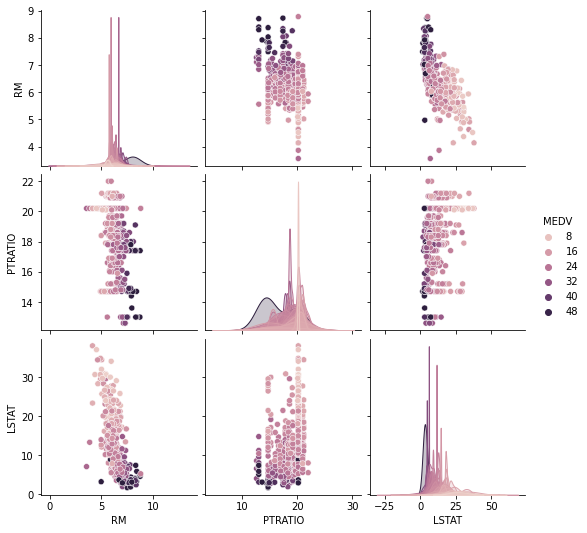

In [38]:
import seaborn as sns
sns.pairplot(features, hue="MEDV")
plt.show

Conseguiu enxergar relação entre alguma das variáveis?

Veja a variável 'RM' e 'MEDV'. Ao que tudo indica, existe uma relação positiva entre a quantidade de quartos e o valor das casas. Quanto mais casas, maior é o valor da casa.

Na variável 'LSTAT' e 'MEDV', porém, parece que ocorre o inverso. Quanto maior a quantidade de pessoas consideradas classe baixa no bairro, menor é o valor dos imóveis. Indicando que a casa está em um bairro mais pobre da cidade.

#### __TAREFA 07__
1. Plote a relação das variáveis de outras variáveis com a variável alvo.
2. Investigue o quanto quiser.

In [39]:
houses_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [43]:
# Insira sua resposta aqui.
features_2 = houses_df.drop(['NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'LSTAT',], axis=1)
features_2.head()

,CRIM,ZN,INDUS,CHAS,MEDV
0,0.00632,18.0,2.31,0,24.0
1,0.02731,0.0,7.07,0,21.6
2,0.02729,0.0,7.07,0,34.7
3,0.03237,0.0,2.18,0,33.4
4,0.06905,0.0,2.18,0,36.2


<function matplotlib.pyplot.show(close=None, block=None)>

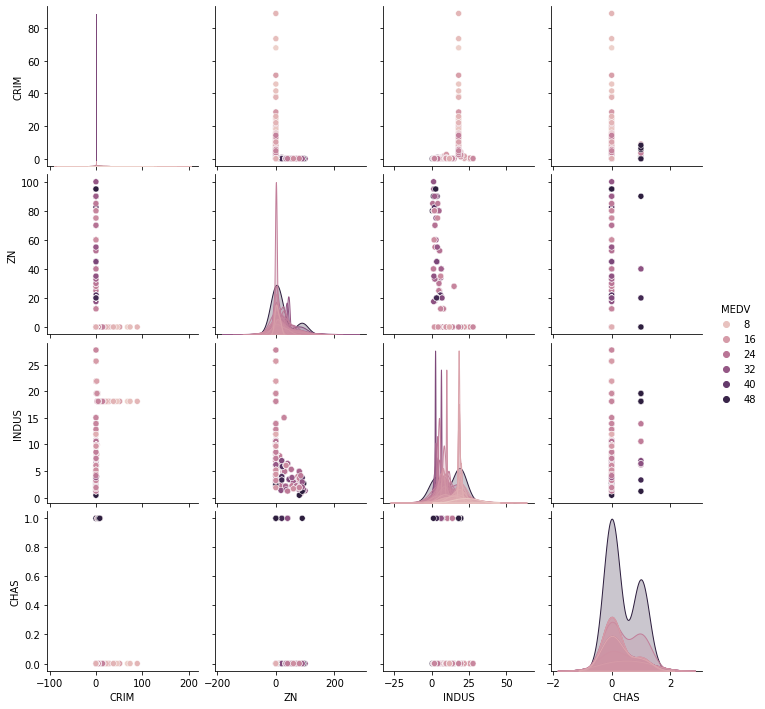

In [44]:
sns.pairplot(features_2,hue="MEDV")
plt.show

In [45]:
# Insira sua resposta aqui.
features_3 = houses_df.drop(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM','PTRATIO', 'LSTAT'], axis=1)
features_3.head()

,AGE,DIS,RAD,TAX,MEDV
0,65.2,4.0900,1,296,24.0
1,78.9,4.9671,2,242,21.6
2,61.1,4.9671,2,242,34.7
3,45.8,6.0622,3,222,33.4
4,54.2,6.0622,3,222,36.2


<function matplotlib.pyplot.show(close=None, block=None)>

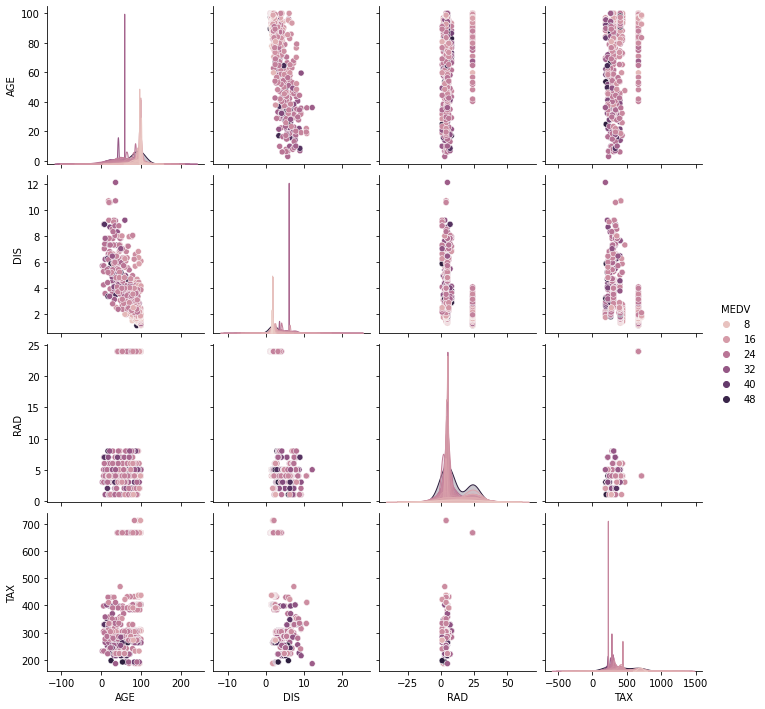

In [46]:
sns.pairplot(features_3,hue="MEDV")
plt.show

Existe outra forma de verificar a relação entre as variáveis. Podemos usar a correlação entre as variáveis.

#### __TAREFA 08__
1. Extraia a matriz de correlação das variáveis.
2. Plote a matriz de correlação usando o seaborn.

In [49]:
# Insira sua resposta aqui
houses_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


<function matplotlib.pyplot.show(close=None, block=None)>

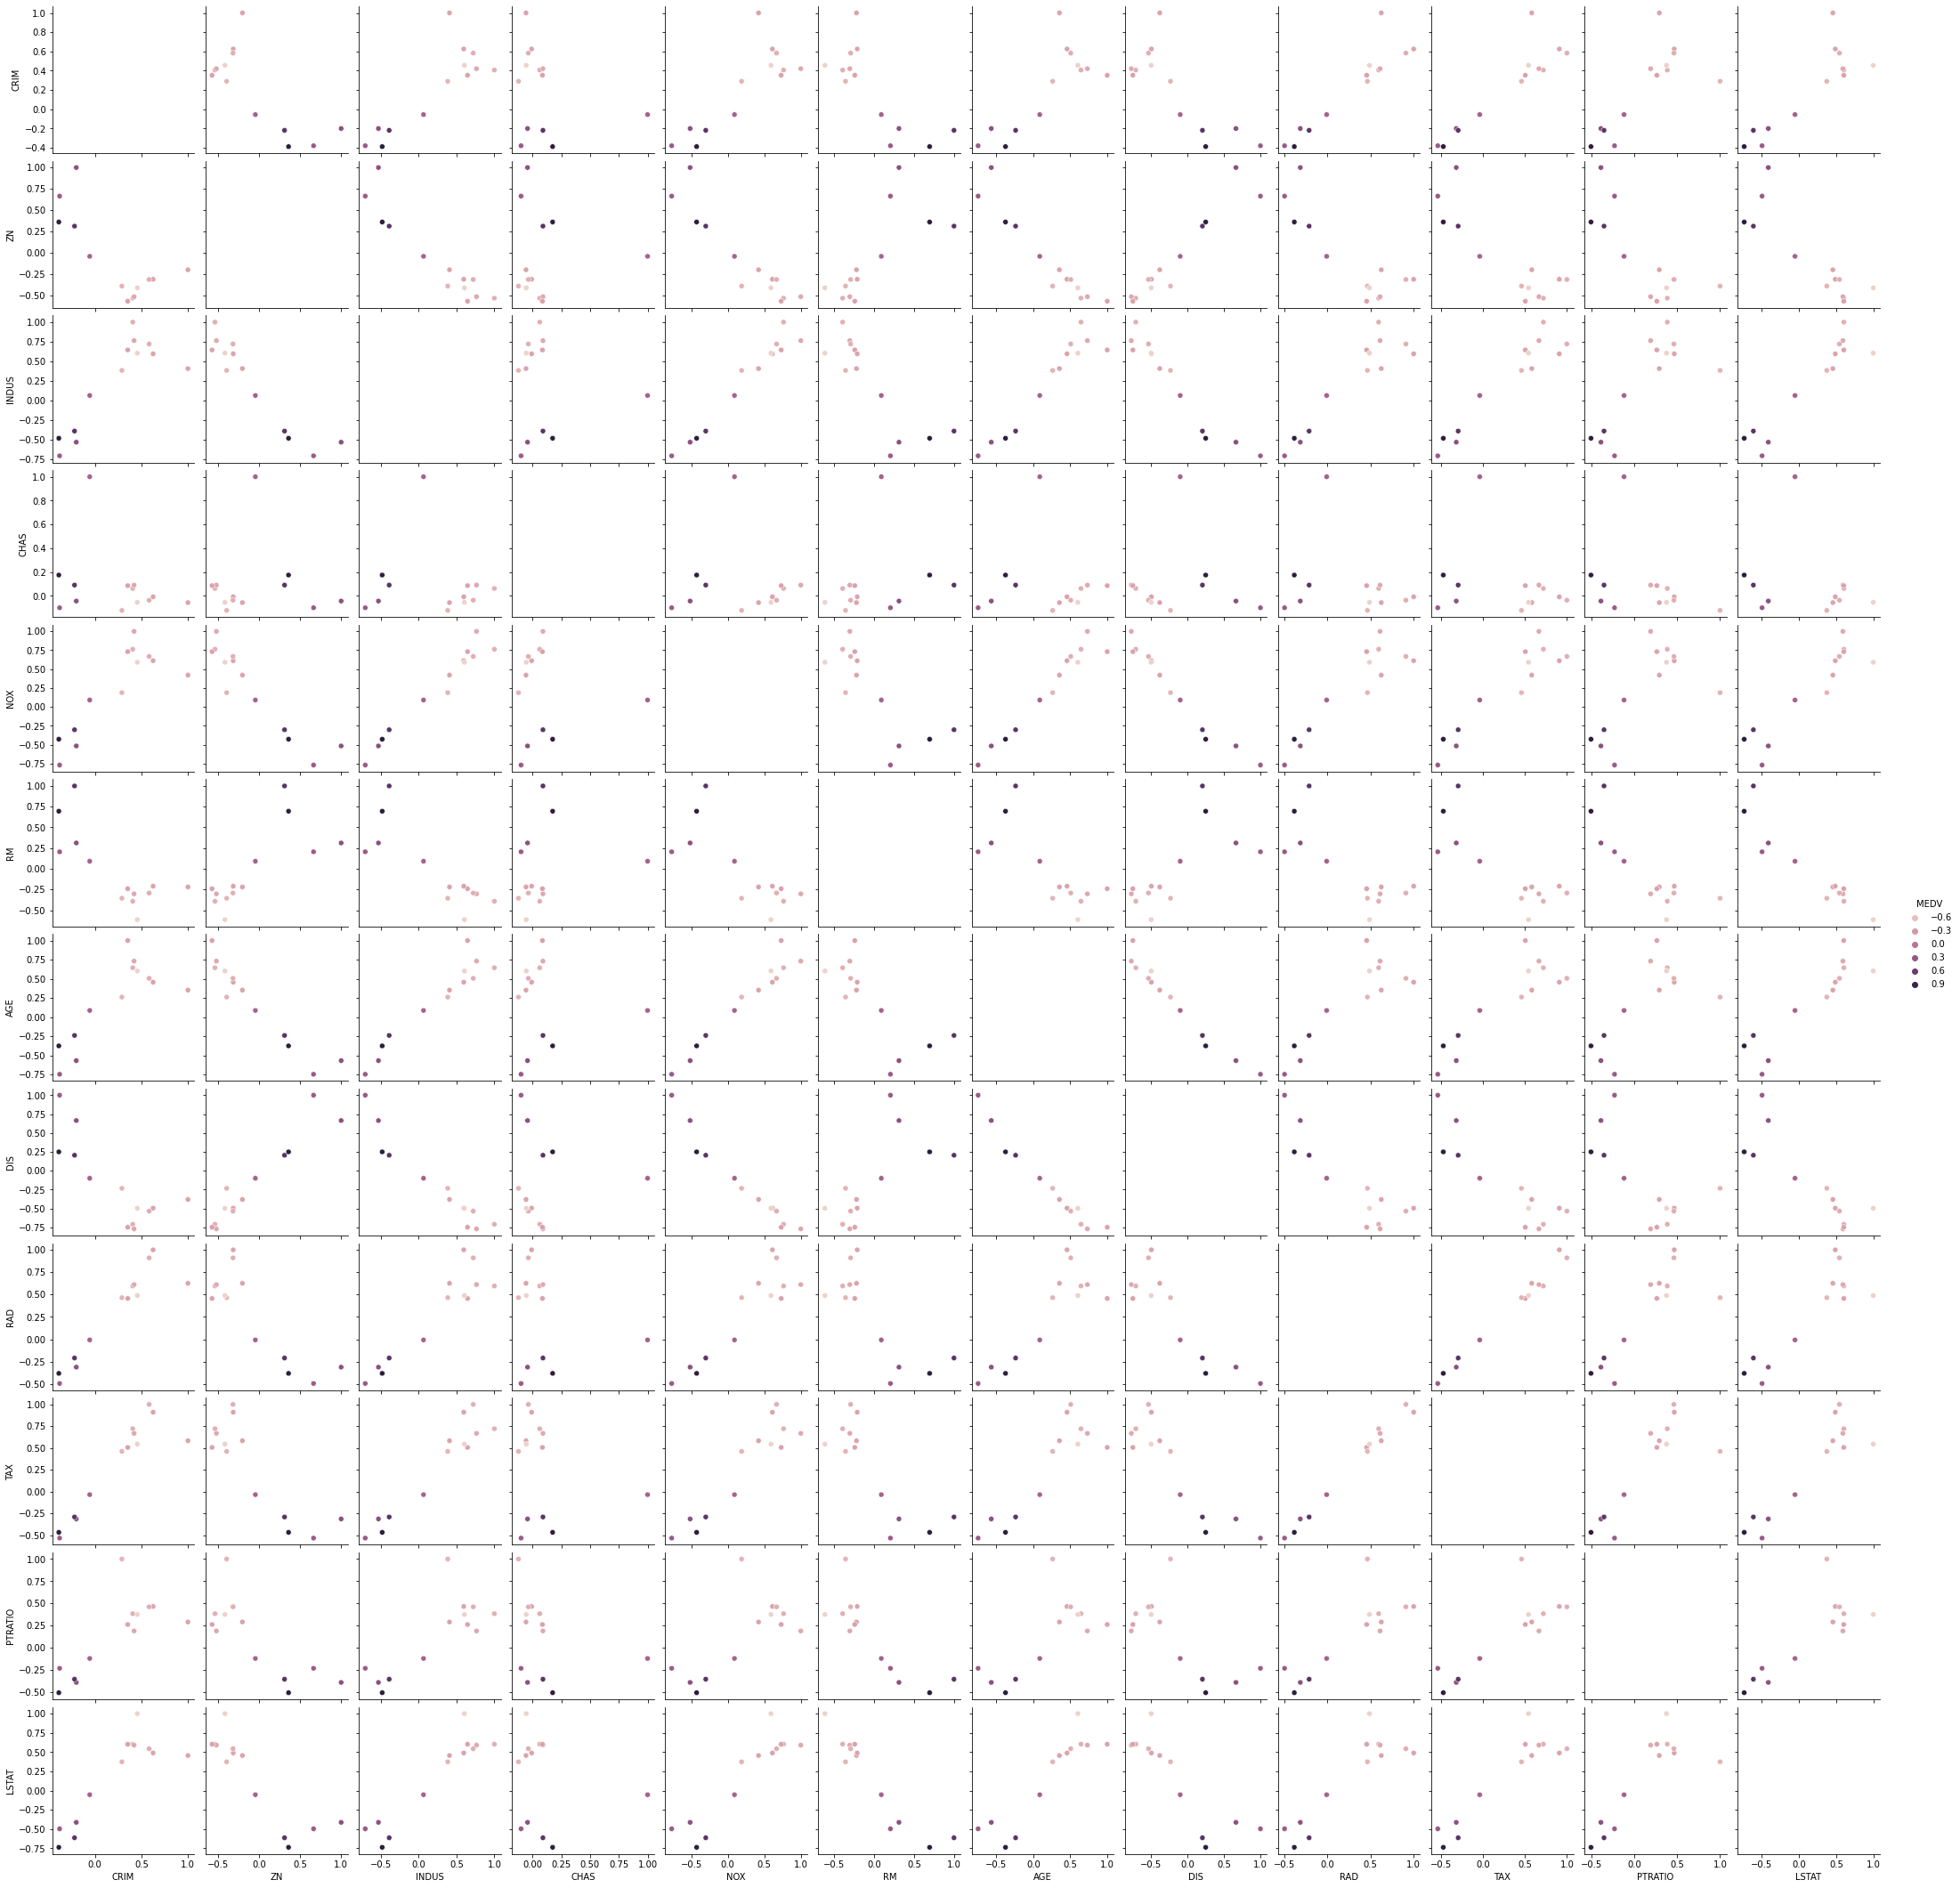

In [50]:
correlacao = houses_df.corr()
sns.pairplot(correlacao, hue="MEDV")
plt.show

O coeficiente de correlação entre as variáveis varia de -1 a 1. Se o valor for próximo de 1, significa que há uma forte correlação positiva entre as duas variáveis. Quando está próximo de -1, as variáveis têm uma forte correlação negativa. Interprete o gráfico!

Devemos ficar atentos àquelas variáveis que possuem forte correlação com o variável alvo, pois elas podem ter peso significativo na performance do nosso modelo. Em Aprendizado de Máquina, esta seleção/exclusão de variáveis preditoras se chamada *Feature Selection*. Neste passo, o cientista de dados pode escolher remover ou combinar variáveis a fim de melhorar (tunning) seu modelo. Não iremos realizar esta etapa por questão de tempo, mas você mesmo pode fazê-la ao término das tarefas.

Vamos analisar melhor a relação das variáveis LSTAT e RM com MEDV?

#### __TAREFA 09__
1. Plote um gráfico de dispersão de LSTAT e RM com MEDV.
2. Utilize subplots, matplotlib e seaborn

In [51]:
houses_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [53]:
features_4 = houses_df.drop(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO'], axis=1)
features_4.head()

,RM,LSTAT,MEDV
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


<AxesSubplot:xlabel='RM', ylabel='LSTAT'>

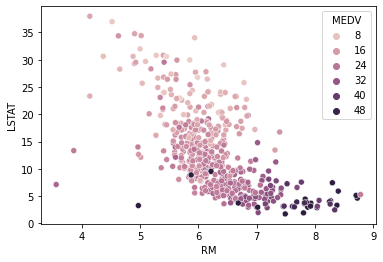

In [60]:
# Insira sua resposta aqui
sns.scatterplot(data=features_4, x="RM", y="LSTAT", hue="MEDV")

Confirmando:
- Os preços aumentam à medida que o valor de RM aumenta linearmente. Existem poucos valores discrepantes e os dados parecem estar limitados a 50.
- Os preços tendem a diminuir com o aumento do LSTAT. Embora não pareça seguir exatamente uma linha linear.

Prosseguindo, vamos analisar a distribuição da variável alvo MEDV.

#### __TAREFA 10__
1. Plote a distribuição da variável alvo.
2. Use `seaborn.distplot()`.

C:\Users\SERGIOMEDINA\Anaconda3\envs\LabDev\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


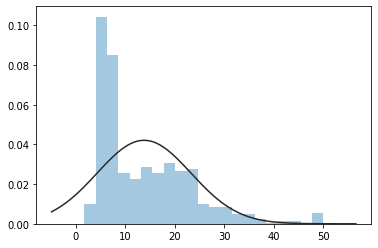

In [68]:
# Insira sua resposta

from scipy.stats import norm

sns.distplot(features_4, fit=norm, kde=False)
plt.show()

Podemos verificar que a variável alvo possui uma distribuição próxima a uma normal. Contudo, podemos notar a presenção de alguns outliers em torno de 50. 

É tarefa essencial verificar a distribuição não só da variável alvo, como de todo o conjunto. Isso porque discrepantes (outliers) podem confundir nosso modelo diminuindo a performance. Esta também é uma tarefa que pode consumir bastante tempo e você é encorajado à fazê-la.

### 2.4 Aplicar um modelo

Após realizar uma investigação superficial*, vamos prosseguir separando nossos dados de treino e teste. Logo após, vamos treinar nosso modelo.

\*Repare que chamamos a etapa anterior de **Análise Exploratória de Dados**, mas a verdade é que nem chegamos perto compreender totalmente o conjunto de dados. O que é normal, pois estamos querendo em entender o processo e não em exaurir o assunto.

#### __TAREFA 11__
1. Separe os dados em treino e teste.
2. Utilize 80% do dados para treino.

**DICA**: Use a função `train_test_split()` do scikit-learn

In [71]:
houses_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [73]:
X = houses_df.drop(["MEDV"], axis=1)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33


In [76]:
y = houses_df["MEDV"]
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [77]:
# Insira sua resposta aqui
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(
                                    X, y, 
                                    test_size=0.2,
                                    random_state=42)


In [79]:
X_treino.shape

(404, 12)

In [80]:
y_treino.shape

(404,)

In [81]:
X_teste.shape

(102, 12)

In [82]:
y_teste.shape

(102,)

Ótimo! Carregamos nossos dados, verificamos se era necessário alguma limpeza, fizemos uma investigação superficial (AED) e separamos dados de treino e teste.

**FINALMENTE**, o grande momento de treinar um algoritmo de Aprendizado de Máquina. Neste caso, vamos utilizar a Regressão Linear. Não entraremos em detalhes, mas a regressão linear,basicamente, gera uma equação que irá descrever a relação estatística entre as variáveis preditoras e a variável alvo. A Regressão Linear encontrará a linha que melhor representa as variáveis de entrada (X) com a variável de saída (Y).

#### __TAREFA 12__
1. Use o algoritmo de Regressão Linear para treinar um modelo
2. Passe os dados de treino de X e Y para o modelo.

In [92]:
# Insira sua resposta aqui

from sklearn.linear_model import LinearRegression


modelo_lr = LinearRegression()

modelo_lr.fit(X,y)


modelo_lr

LinearRegression()

Sim, com algumas linhas de código você terá um modelo treinado no scikit-learn. Percebeu que gastamos mais tempo preparando e entendendo os dados do que treinando o modelo? Muito bom, não é? É exatamente assim que o cientista de dados gasta a maior parte do seu tempo: preparando e entendendo os dados.

### 2.5. Interpretar os resultados
Vamos verificar a performance do nosso modelo.

#### __TAREFA 13__
1. Utilize os dados de treino para prever a variável alvo.
2. Como métrica de performance, utilize o score R^2 

In [94]:
# Insira sua resposta aqui
valor_predito = modelo_lr.predict(X_teste)

print(f" Valor de predito = {valor_predito}")


 Valor de predito = [29.06311055 36.27929516 13.33411349 24.57909925 17.73288762 23.03803615
 17.41438191 13.09511731 22.34203147 20.22485547 24.7939717  18.71966912
 -3.12350834 21.15826976 19.49625938 24.90615709 20.49666144  5.49213058
 40.74958036 16.51771346 27.17405749 30.31007898 11.52648291 23.49549557
 17.95515455 16.05102789 22.33465511 17.79530896 22.43439864 18.87317724
 22.94172415 24.83301905 24.17932289 17.7333695  16.67577256 17.93997867
 30.60818602 20.11932836 23.60134192 24.10411089 13.65509137 32.70344201
 43.12737947 17.34408592 27.19109696 16.37872796 14.49395604 25.20041168
 19.36331001 30.03373805 21.39246353 34.29920449 15.59842603 25.51863012
 39.15983262 21.52695113 17.81786431 33.51024601 24.75035765 13.26351402
 22.3430303  31.07547354 31.24012589 17.09180043 20.72649866 16.96818856
 19.3702223  26.05135651 31.43055097 15.3185462  20.28694959 26.47357803
 11.79240653 16.86576736 23.3090221   4.96950183 21.41321452 41.95475404
 17.30767055  8.15251024 20.769

In [95]:
r_quadrado = model_lr.score(X,y)

coeficiente_angular = model_lr.coef_

intercept_b = model_lr.intercept_

print(f" Valor de R2 = {r_quadrado}")
print(f" Valor do coeficiente angular = {coeficiente_angular}")
print(f" Valor do Intercept= {intercept_b}")

 Valor de R2 = 0.7343070437613076
 Valor do coeficiente angular = [-1.21388618e-01  4.69634633e-02  1.34676947e-02  2.83999338e+00
 -1.87580220e+01  3.65811904e+00  3.61071055e-03 -1.49075365e+00
  2.89404521e-01 -1.26819813e-02 -9.37532900e-01 -5.52019101e-01]
 Valor do Intercept= 41.61727017595446


#### __TAREFA 14__
1. Utilize os dados de teste para prever a variável alvo.
2. Como métrica de performance, utilize o score R^2

In [98]:
# Insira sua resposta aqui

teste2 = np.array([[0.02731,0.0, 7.07, 0, 0.469, 6.421, 78.9, 4.9671, 2, 242,17.8, 9.14]])
#teste2_reshape=teste2.reshape(-1, 1)
valor_predito = modelo_lr.predict(teste2)



print(f" Valor de predito = {valor_predito}")


 Valor de predito = [25.05683368]


In [99]:
r_quadrado2 = model_lr.score(X,y)

coeficiente_angular2 = model_lr.coef_

intercept_b2 = model_lr.intercept_

print(f" Valor de R2 = {r_quadrado2}")
print(f" Valor do coeficiente angular = {coeficiente_angular2}")
print(f" Valor do Intercept= {intercept_b2}")

 Valor de R2 = 0.7343070437613076
 Valor do coeficiente angular = [-1.21388618e-01  4.69634633e-02  1.34676947e-02  2.83999338e+00
 -1.87580220e+01  3.65811904e+00  3.61071055e-03 -1.49075365e+00
  2.89404521e-01 -1.26819813e-02 -9.37532900e-01 -5.52019101e-01]
 Valor do Intercept= 41.61727017595446


## 3. Conclusão
O fluxo de trabalho de Aprendizado de Máquina não termina após a avaliação de performance do modelo escolhido. Na verdade, esta seria somente a primeira interaçãão de um processo que pode ter dezenas de tentativas.

Encorajamos você a repetir novamente o processo descrito neste notebook. Contudo, explorando novas possibilidades para verificar a melhora/piora da performance do seu modelo. 

Você pode, por exemplo, remover variáveis/atributos menos importantes, normalizar variáveis importantes e escolher outros algoritmos de aprendizagem supervisionada. O Aprendizado de Máquina é uma área interessante justamente por causa disto. Você testa, você erra, você recomeça.